In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy

# Simple Linear Regression

### Dataset - Salary dataset - 2 columns - Predict salary based on years of experience

#### dataset - https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression

In [2]:
df_sl = pd.read_csv('./salary dataset/salarydataset.csv', index_col=0)
df_sl.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


### Visualize the dataset

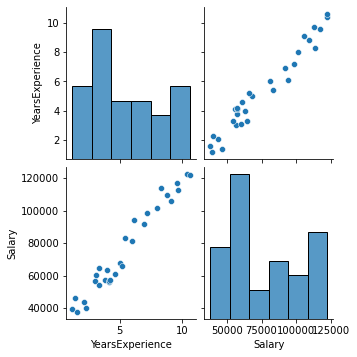

In [3]:
sns.pairplot(df_sl)

### Split into train and test sets

In [4]:
X = df_sl['YearsExperience']
y = df_sl['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

C:\Users\KENILS~1\AppData\Local\Temp/ipykernel_19844/3396469739.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = X_train[:, np.newaxis]
C:\Users\KENILS~1\AppData\Local\Temp/ipykernel_19844/3396469739.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_test = X_test[:, np.newaxis]


### Training the model

In [5]:
clf_lr = LinearRegression()
clf_lr.fit(X_train, y_train)

y_pred = clf_lr.predict(X_test)

print("Training Accuracy: ", clf_lr.score(X_train, y_train))
print("Test Accuracy: ", clf_lr.score(X_test, y_test))
print("Mean Squared Loss: ", metrics.mean_squared_error(y_test, y_pred))

Training Accuracy:  0.9411949620562127
Test Accuracy:  0.988169515729126
Mean Squared Loss:  12823412.298126565


### Visualize accuracy on testing set

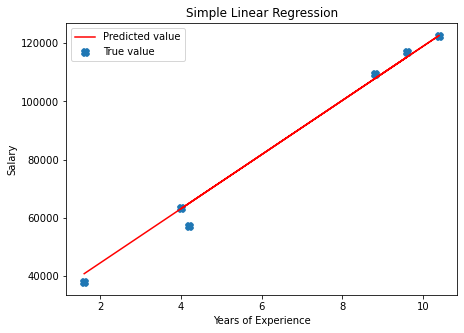

In [6]:
fig,ax = plt.subplots(figsize=(7,5))
ax.scatter(X_test, y_test, label='True value', marker='X', linewidth=3)
ax.plot(X_test, y_pred, label='Predicted value', color='red')
ax.set_xlabel("Years of Experience")
ax.set_ylabel("Salary")
ax.set_title("Simple Linear Regression")
ax.legend()
plt.show()

# Multiple Linear Regression

### Dataset - Wine quality dataset -  12 columns - Predict quality of wine based on 11 features

#### dataset - https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

In [7]:
df = pd.read_csv('./red wine dataset/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Check for null values

In [8]:
# df['quality'].value_counts()
# df.drop_duplicates(inplace=True)
# df.reset_index(drop=True)
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Model accuracy before any optimizations

In [9]:
X = df[list(df.columns)[:len(list(df.columns))-1]]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, stratify=y, random_state=0)

clf_lr = LinearRegression()
clf_lr.fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)

print("Train Accuracy: ", clf_lr.score(X_train, y_train))
print("Test Accuracy: ", clf_lr.score(X_test, y_test))
print("Mean Squared Loss: ", metrics.mean_squared_error(y_test, y_pred))

Train Accuracy:  0.35421449088376
Test Accuracy:  0.37850248102045914
Mean Squared Loss:  0.40103584046964985


### Visualize the dataset to check for correlation and outliers

<AxesSubplot:>

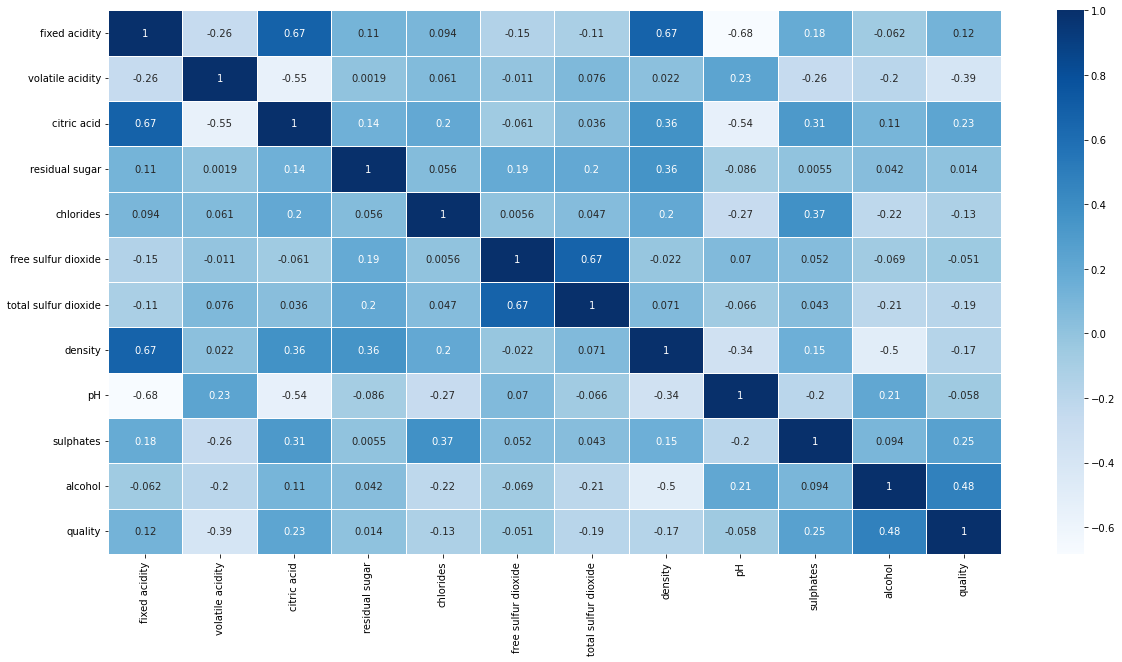

In [10]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", linewidth=0.5)

#### Fixed acidity has strong posity correlation with density and citric acid, and strong negative correlation with pH. Also Free sulpher dioxide has strong correlation with total sulfer dioxide. So let's drop both of these columns

In [11]:
df.drop(columns=['fixed acidity','free sulfur dioxide'], inplace=True)
df

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...
1594,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


<AxesSubplot:>

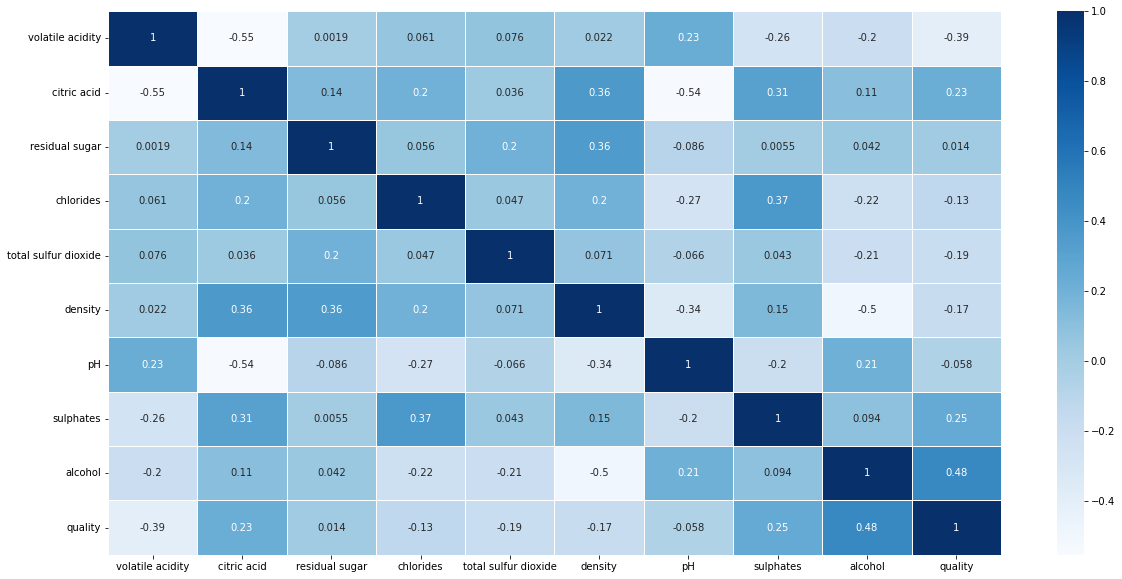

In [12]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", linewidth=0.5)

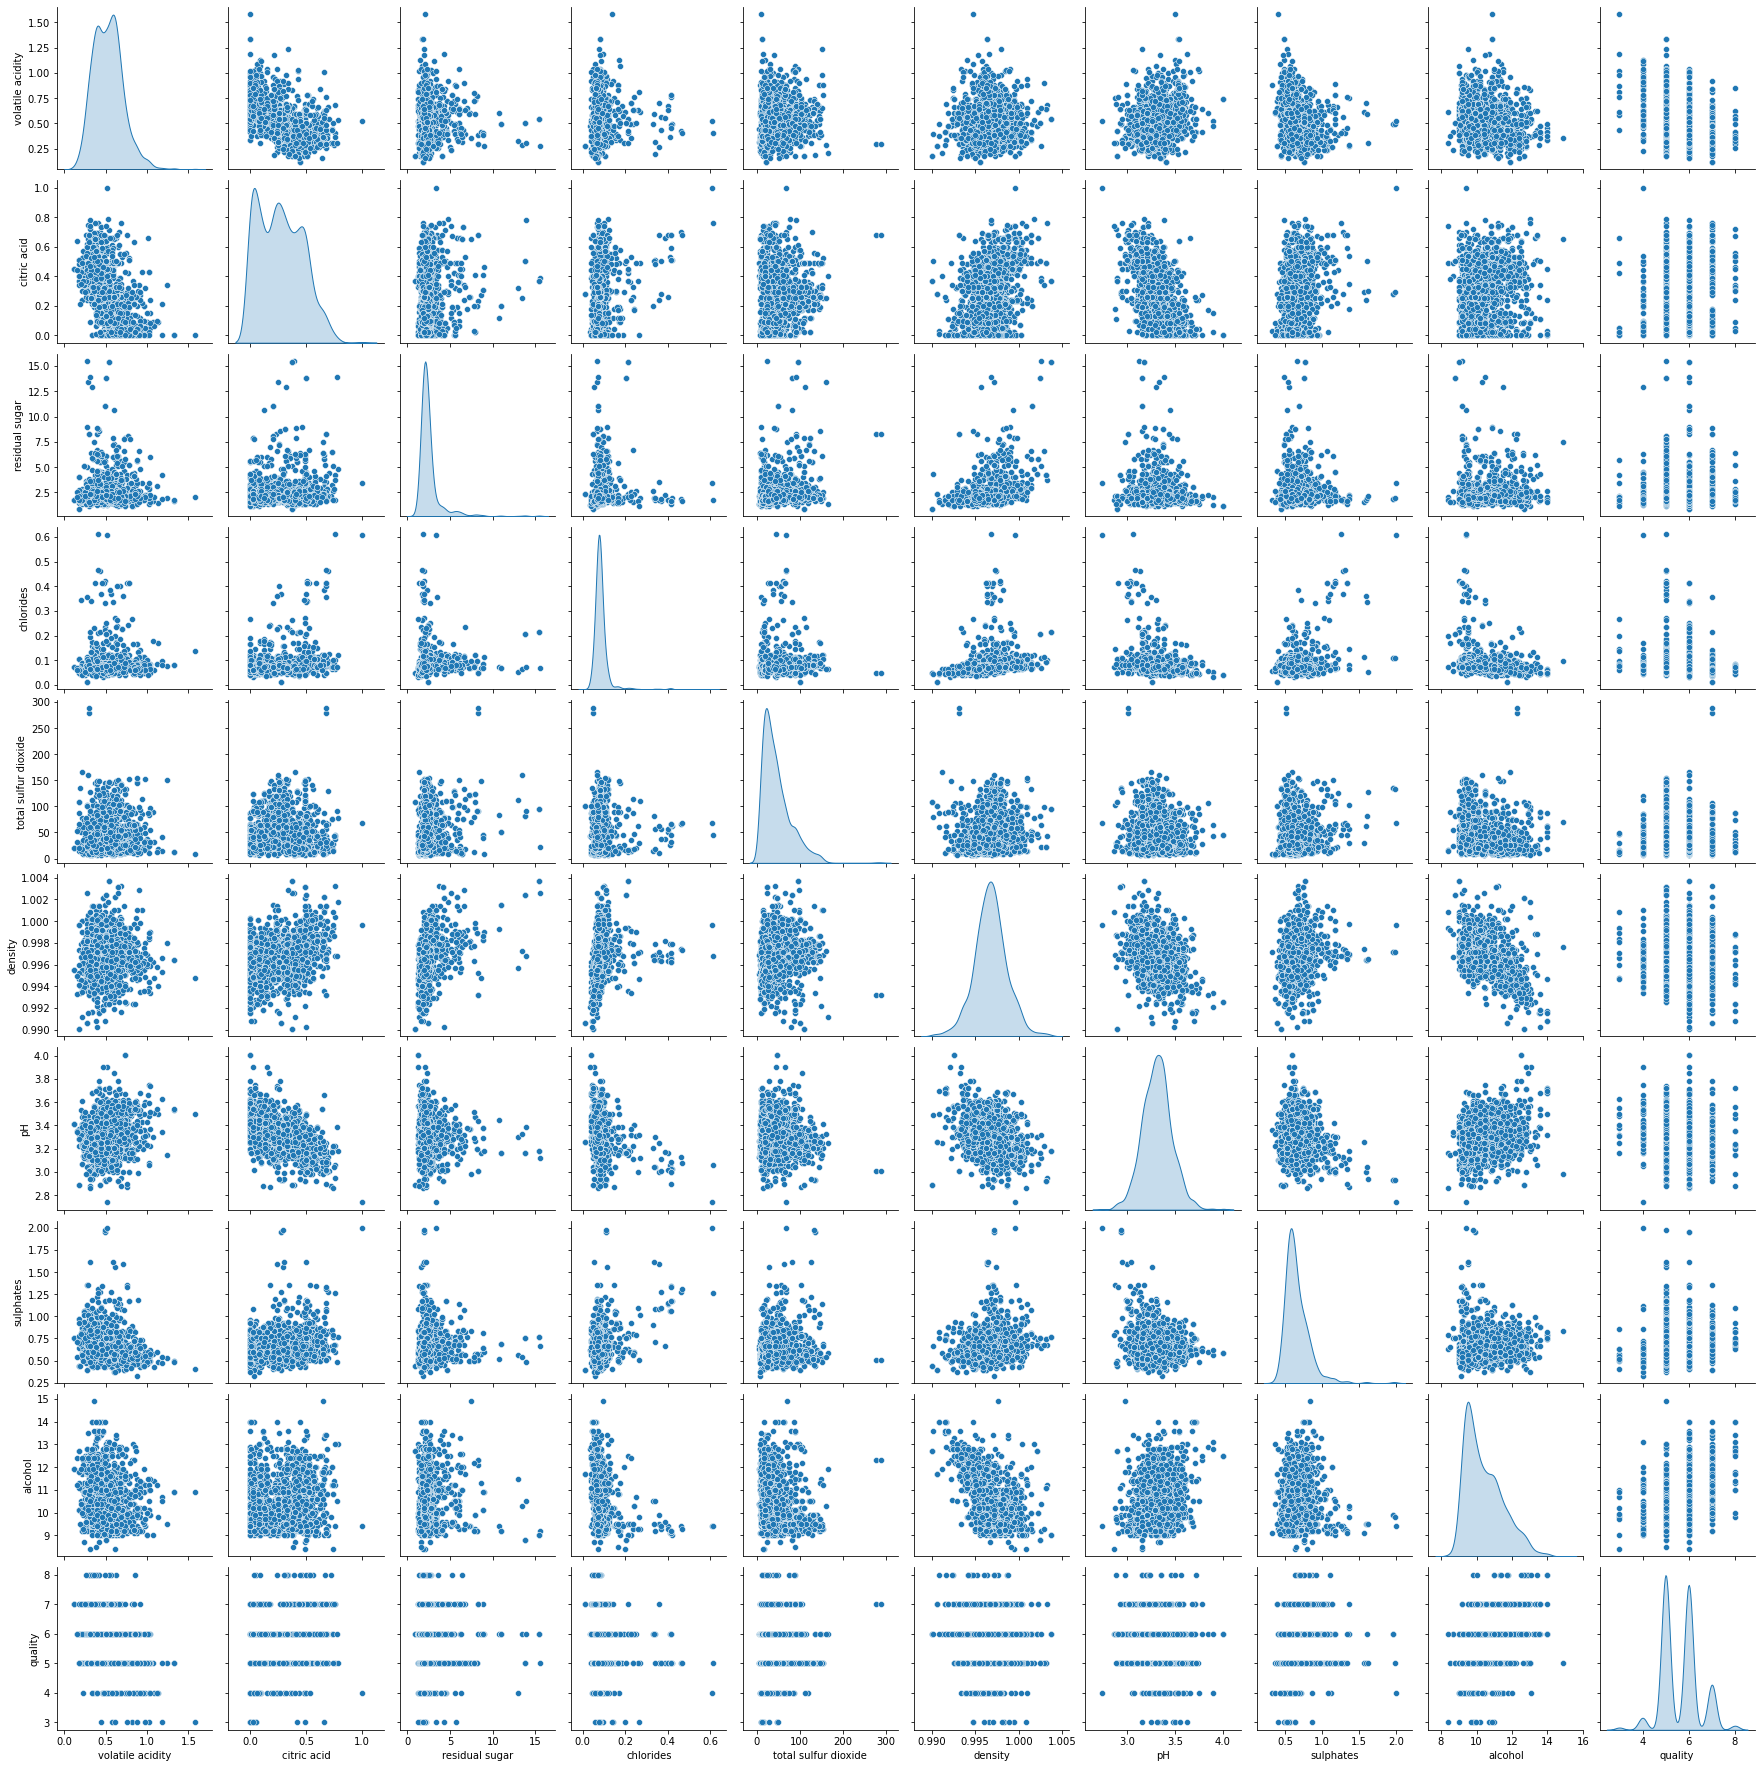

In [13]:
sns.pairplot(df, diag_kind='kde')

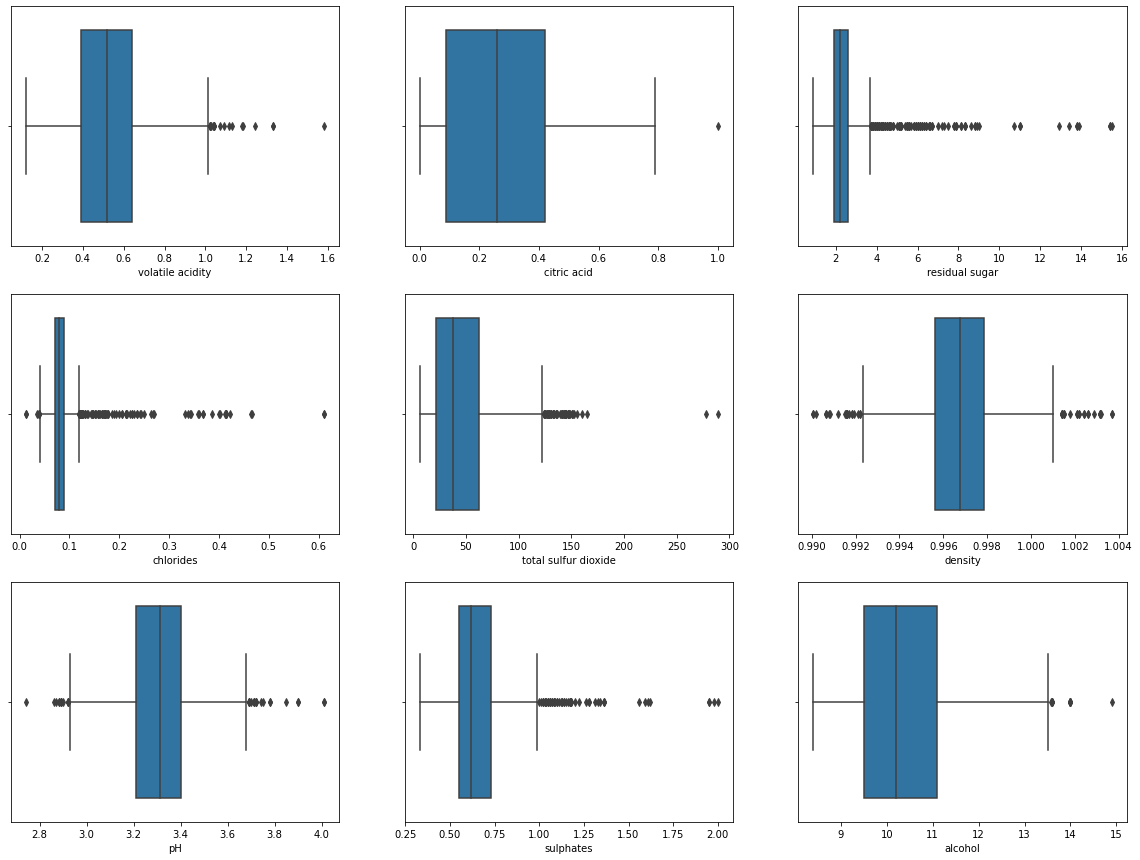

In [14]:
fig,axes = plt.subplots(3,3,figsize=(20,15))
ax = sns.boxplot(x=df['volatile acidity'], ax=axes[0,0])
ax = sns.boxplot(x=df['citric acid'], ax=axes[0,1])
ax = sns.boxplot(x=df['residual sugar'], ax=axes[0,2])
ax = sns.boxplot(x=df['chlorides'], ax=axes[1,0])
ax = sns.boxplot(x=df['total sulfur dioxide'], ax=axes[1,1])
ax = sns.boxplot(x=df['density'], ax=axes[1,2])
ax = sns.boxplot(x=df['pH'], ax=axes[2,0])
ax = sns.boxplot(x=df['sulphates'], ax=axes[2,1])
ax = sns.boxplot(x=df['alcohol'], ax=axes[2,2])

### Handling skewed data for residual sugar, chlorides

In [15]:
# df['residual sugar'] = np.log(df['residual sugar'])
# df['chlorides'] = np.log(df['chlorides'])

#boxcox transformation
df['residual sugar'], fitted_lambda = scipy.stats.boxcox(df['residual sugar'], lmbda=None)
df['sulphates'], fitted_lambda = scipy.stats.boxcox(df['sulphates'], lmbda=None)
df['total sulfur dioxide'], fitted_lambda = scipy.stats.boxcox(df['total sulfur dioxide'], lmbda=None)
df['chlorides'], fitted_lambda = scipy.stats.boxcox(df['chlorides'], lmbda=None)

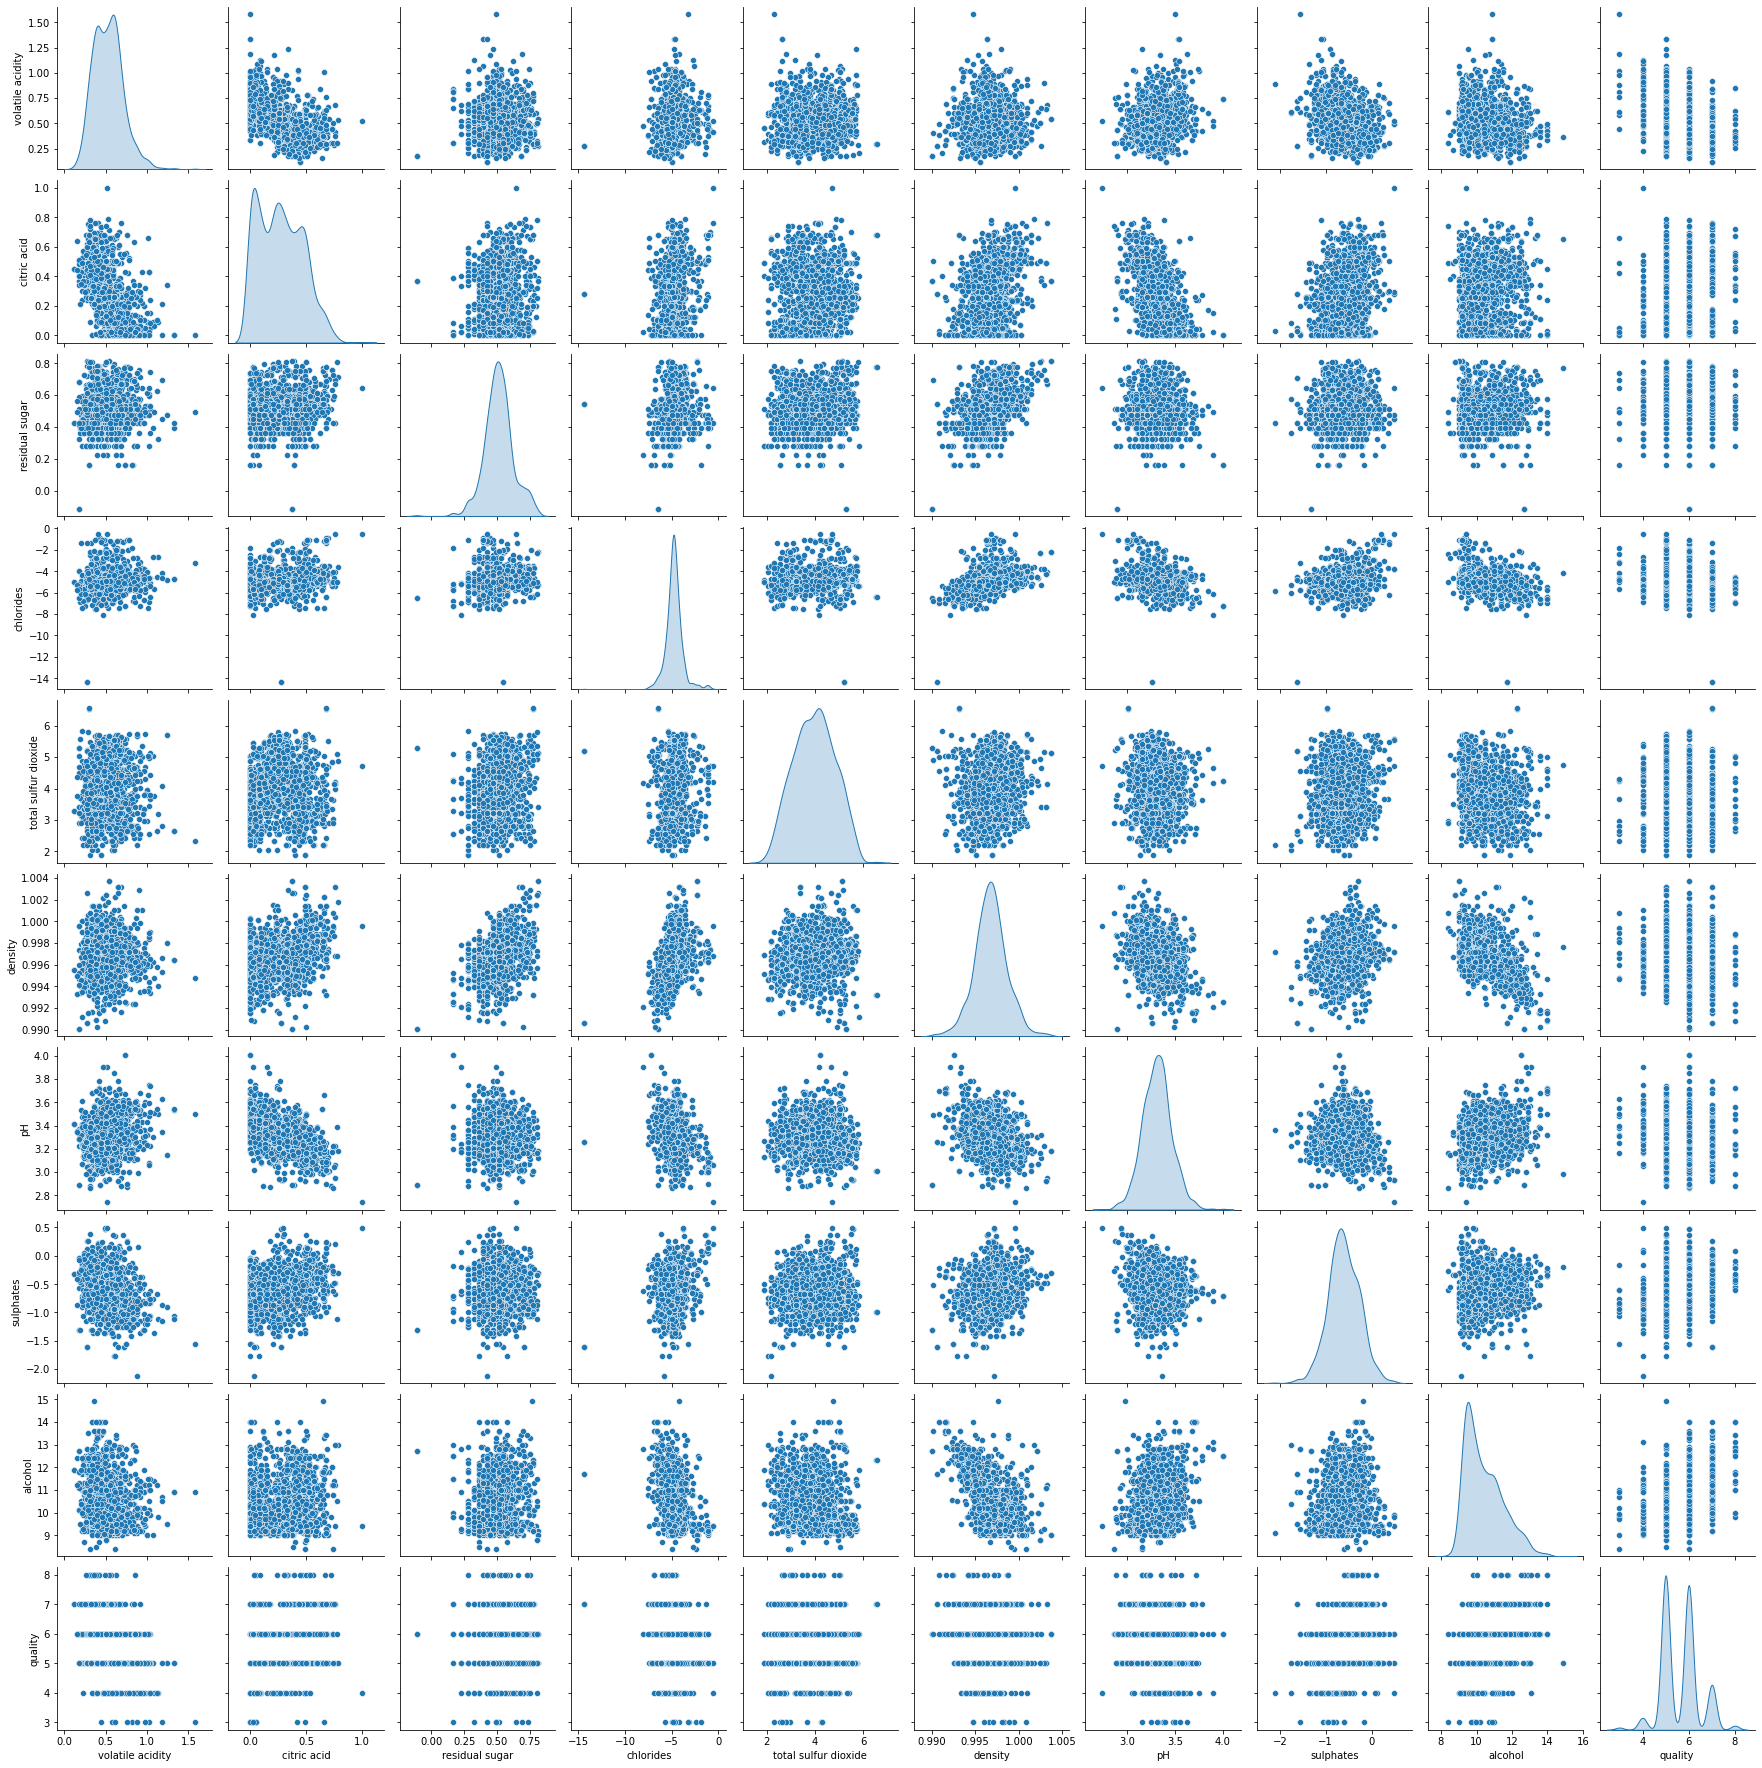

In [16]:
sns.pairplot(df, diag_kind='kde')

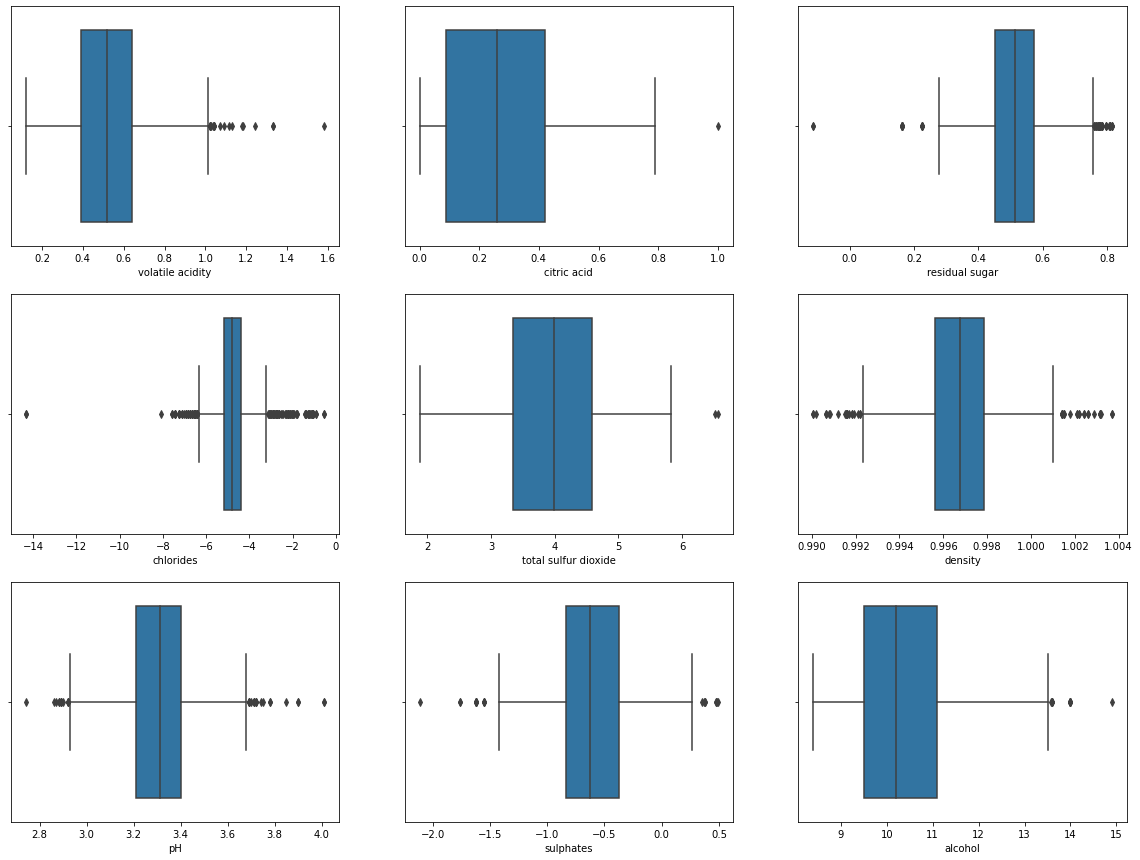

In [17]:
fig,axes = plt.subplots(3,3,figsize=(20,15))
ax = sns.boxplot(x=df['volatile acidity'], ax=axes[0,0])
ax = sns.boxplot(x=df['citric acid'], ax=axes[0,1])
ax = sns.boxplot(x=df['residual sugar'], ax=axes[0,2])
ax = sns.boxplot(x=df['chlorides'], ax=axes[1,0])
ax = sns.boxplot(x=df['total sulfur dioxide'], ax=axes[1,1])
ax = sns.boxplot(x=df['density'], ax=axes[1,2])
ax = sns.boxplot(x=df['pH'], ax=axes[2,0])
ax = sns.boxplot(x=df['sulphates'], ax=axes[2,1])
ax = sns.boxplot(x=df['alcohol'], ax=axes[2,2])

### Dropping outliers

In [18]:
def drop_outlier(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)

drop_outlier(df, 'volatile acidity')
drop_outlier(df, 'citric acid')
drop_outlier(df, 'residual sugar')
drop_outlier(df, 'chlorides')
drop_outlier(df, 'total sulfur dioxide')
drop_outlier(df, 'density')
drop_outlier(df, 'pH')
drop_outlier(df, 'sulphates')
drop_outlier(df, 'alcohol')

In [19]:
df.isnull().sum()

volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

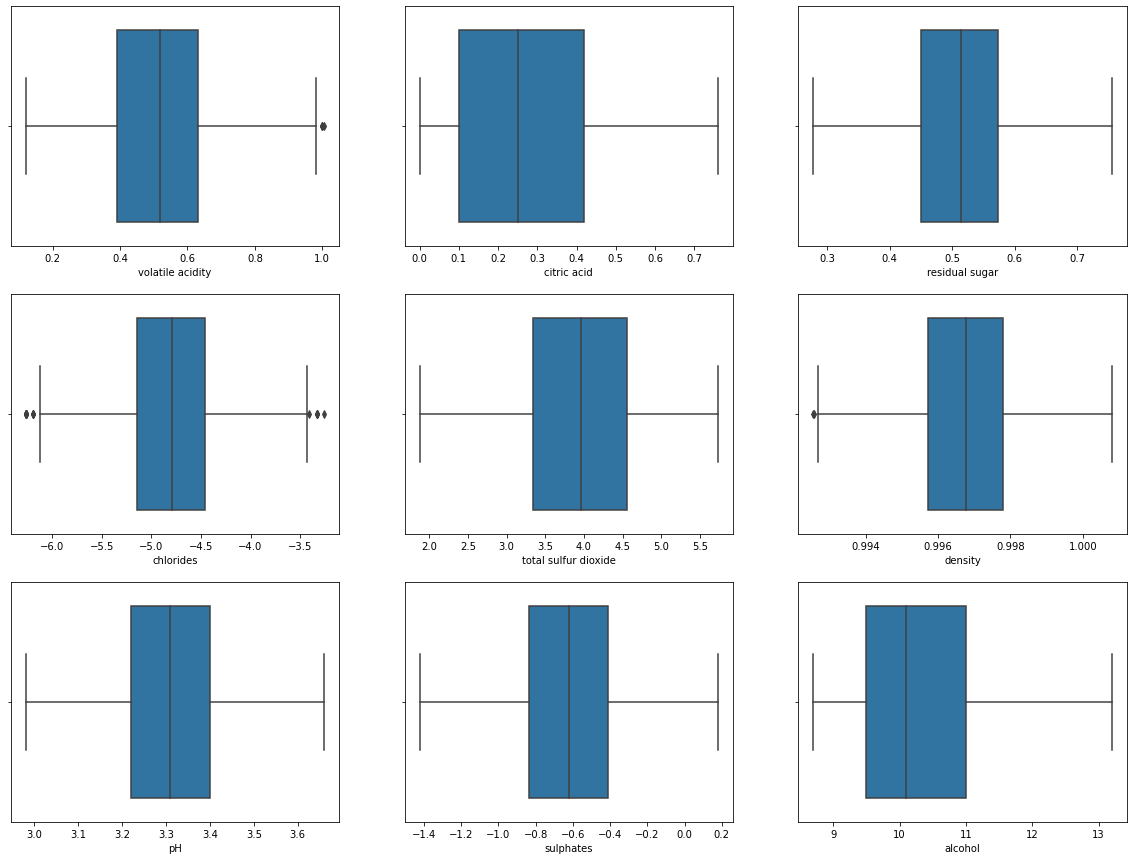

In [20]:
fig,axes = plt.subplots(3,3,figsize=(20,15))
ax = sns.boxplot(x=df['volatile acidity'], ax=axes[0,0])
ax = sns.boxplot(x=df['citric acid'], ax=axes[0,1])
ax = sns.boxplot(x=df['residual sugar'], ax=axes[0,2])
ax = sns.boxplot(x=df['chlorides'], ax=axes[1,0])
ax = sns.boxplot(x=df['total sulfur dioxide'], ax=axes[1,1])
ax = sns.boxplot(x=df['density'], ax=axes[1,2])
ax = sns.boxplot(x=df['pH'], ax=axes[2,0])
ax = sns.boxplot(x=df['sulphates'], ax=axes[2,1])
ax = sns.boxplot(x=df['alcohol'], ax=axes[2,2])

### Standardize the dataset

In [21]:
# stdcols = ['pH', 'alcohol']
# df_vals = df[stdcols].values
# std = preprocessing.StandardScaler()
# df_std = std.fit_transform(df_vals)
# df[stdcols] = pd.DataFrame(df_std, columns=stdcols)[stdcols]

### Split the dataset into train and test sets

In [22]:
X = df[list(df.columns)[:len(list(df.columns))-1]]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, stratify=y, random_state=0)

In [23]:
X_train.isnull().sum()

volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

### Training the model

In [24]:
clf_lr = LinearRegression()
clf_lr.fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)

print("Train Accuracy: ", clf_lr.score(X_train, y_train))
print("Test Accuracy: ", clf_lr.score(X_test, y_test))
print("Mean Squared Loss: ", metrics.mean_squared_error(y_test, y_pred))

Train Accuracy:  0.3870926652209091
Test Accuracy:  0.418458969382984
Mean Squared Loss:  0.3518847904685831


In [25]:
clf_sgd = SGDRegressor(verbose=2, random_state=0)
clf_sgd.fit(X_train, y_train)

print("Train Accuracy: ", clf_sgd.score(X_train, y_train))
print("Test Accuracy: ", clf_sgd.score(X_test, y_test))

-- Epoch 1
Norm: 0.47, NNZs: 9, Bias: 0.040262, T: 1070, Avg. loss: 0.295517
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.53, NNZs: 9, Bias: 0.050328, T: 2140, Avg. loss: 0.247870
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.52, NNZs: 9, Bias: 0.055892, T: 3210, Avg. loss: 0.239772
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.58, NNZs: 9, Bias: 0.066849, T: 4280, Avg. loss: 0.238186
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.62, NNZs: 9, Bias: 0.075349, T: 5350, Avg. loss: 0.232378
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.63, NNZs: 9, Bias: 0.082829, T: 6420, Avg. loss: 0.230873
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.66, NNZs: 9, Bias: 0.090224, T: 7490, Avg. loss: 0.228224
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.68, NNZs: 9, Bias: 0.099193, T: 8560, Avg. loss: 0.225998
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.71, NNZs: 9, Bias: 0.107703, T: 9630, Avg. loss: 0.226624
Total training time: 0.00 s

### Visualize the squared error loss in SGDRegressor

[Text(0.5, 1.0, 'Loss over 24 Epochs in Linear Regression'),
 Text(0.5, 0, 'Epochs'),
 Text(0, 0.5, 'Loss')]

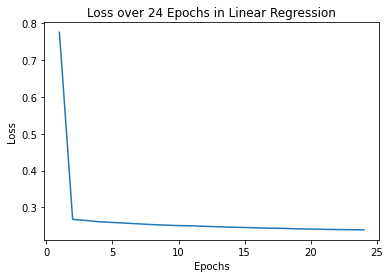

In [26]:
loss = [0.776045, 0.267255, 0.264441, 0.260797, 0.259019, 0.257059, 0.255154, 0.253066, 0.251695, 0.250374,  0.249886, 0.248314, 0.247290, 0.245951, 0.245302, 0.244189, 0.243313, 0.242811, 0.241629, 0.241035, 0.240238, 0.239576, 0.239363, 0.238636]
loss = np.array(loss)
epochs = np.arange(1,25)

sns.lineplot(x=epochs, y=loss).set(title="Loss over 24 Epochs in Linear Regression", xlabel="Epochs", ylabel="Loss")

# Linear Regression with Categorical data

### Dataset - Real Estate dataset - 4 columns - Predict price based on 3 features, one of them categorical

#### dataset - https://www.kaggle.com/datasets/gauravduttakiit/real-estate-price/data

In [27]:
df_re = pd.read_csv('./real estate dataset/real_estate_price.csv')
df_re.head()

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view


### Checking for null values

In [28]:
df_re.isnull().sum()

price    0
size     0
year     0
view     0
dtype: int64

### One-hot encoding the column view

In [29]:
enc = preprocessing.OneHotEncoder(sparse=False)
view = df_re[['view']]
view_enc = enc.fit_transform(view)
df_view = pd.DataFrame(view_enc, columns = enc.get_feature_names_out())
df_view.head()

,view_No sea view,view_Sea view
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0


In [30]:
df_re.drop(columns=['view'], inplace=True)
df_re['view_No sea view'] = df_view['view_No sea view']
df_re['view_Sea view'] = df_view['view_Sea view']
df_re.head()

,price,size,year,view_No sea view,view_Sea view
0,234314.144,643.09,2015,1.0,0.0
1,228581.528,656.22,2009,1.0,0.0
2,281626.336,487.29,2018,0.0,1.0
3,401255.608,1504.75,2015,1.0,0.0
4,458674.256,1275.46,2009,0.0,1.0


### Visualize the dataset

In [31]:
# sns.pairplot(df_re, diag_kind='kde')

### Standardizing size column

In [32]:
size = df_re[['size']].values
std = preprocessing.StandardScaler()
size_scaled = std.fit_transform(size)
df_size = pd.DataFrame(size_scaled, columns=['size'])
df_re['size'] = df_size['size']
df_re.head()

,price,size,year,view_No sea view,view_Sea view
0,234314.144,-0.708164,2015,1.0,0.0
1,228581.528,-0.663873,2009,1.0,0.0
2,281626.336,-1.233719,2018,0.0,1.0
3,401255.608,2.198445,2015,1.0,0.0
4,458674.256,1.424989,2009,0.0,1.0


### Dealing with Year column

### Approach 1 - Drop the column

In [33]:
X1 = df_re.drop(columns=['year','price'])
y = df_re['price']
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=0)
X1.head()

,size,view_No sea view,view_Sea view
0,-0.708164,1.0,0.0
1,-0.663873,1.0,0.0
2,-1.233719,0.0,1.0
3,2.198445,1.0,0.0
4,1.424989,0.0,1.0


In [34]:
clf_lr = LinearRegression()
clf_lr.fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)

print("Train Accuracy: ", clf_lr.score(X_train, y_train))
print("Test Accuracy: ", clf_lr.score(X_test, y_test))

Train Accuracy:  0.909031896492088
Test Accuracy:  0.8035867488898637


### Approach 2 - One hot encode the columns - 4 unique values in year

In [35]:
enc = preprocessing.OneHotEncoder(sparse=False)
year = df_re[['year']]
year_enc = enc.fit_transform(year)
df_year = pd.DataFrame(year_enc, columns = enc.get_feature_names_out())
df_re[list(enc.get_feature_names_out())] = df_year[list(enc.get_feature_names_out())]
df_re.head()

,price,size,year,view_No sea view,view_Sea view,year_2006,year_2009,year_2015,year_2018
0,234314.144,-0.708164,2015,1.0,0.0,0.0,0.0,1.0,0.0
1,228581.528,-0.663873,2009,1.0,0.0,0.0,1.0,0.0,0.0
2,281626.336,-1.233719,2018,0.0,1.0,0.0,0.0,0.0,1.0
3,401255.608,2.198445,2015,1.0,0.0,0.0,0.0,1.0,0.0
4,458674.256,1.424989,2009,0.0,1.0,0.0,1.0,0.0,0.0


In [36]:
X2 = df_re.drop(columns=['price'])
y = df_re['price']
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=0)
X2.head()

,size,year,view_No sea view,view_Sea view,year_2006,year_2009,year_2015,year_2018
0,-0.708164,2015,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.663873,2009,1.0,0.0,0.0,1.0,0.0,0.0
2,-1.233719,2018,0.0,1.0,0.0,0.0,0.0,1.0
3,2.198445,2015,1.0,0.0,0.0,0.0,1.0,0.0
4,1.424989,2009,0.0,1.0,0.0,1.0,0.0,0.0


In [37]:
clf_lr = LinearRegression()
clf_lr.fit(X_train, y_train)

print("Train Accuracy: ", clf_lr.score(X_train, y_train))
print("Test Accuracy: ", clf_lr.score(X_test, y_test))

Train Accuracy:  0.9246614221169476
Test Accuracy:  0.8537174299152527
